In [1]:
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


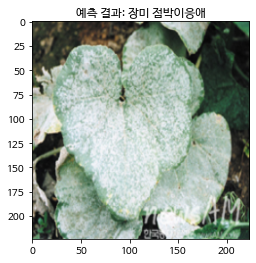

장미 점박이응애


In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()

model = models.resnet34()
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.load_state_dict(torch.load('/content/drive/MyDrive/ColabNotebooks/modelhospital_weights.pth'))
model.eval()

class_names=['장미 검은무늬병', '장미 점박이응애', '장미 흰가루병']


# image = Image.open('/content/drive/MyDrive/ColabNotebooks/rose2.jpg')
image = Image.open('/content/drive/MyDrive/ColabNotebooks/5.pp_2851_1.jpg')

image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])
    print(class_names[preds[0]])



*   모델 고도화 작업 필요
*   데이터 클래스 추가 필요
*   vs code에서 돌아가도록 pytorch cpu버전 깔아야 될듯





